# Regressao Linear Simples

Esse código tem como objetivo utilizar o método de regressão simples para prever resultados de consumo de combustível utilizando os dados de potência, além de analisar os resultados.
A base de dados utilizada foi o dataset público auto-mpg.

#### Passo 0: Import Libs

In [16]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn import datasets, linear_model
from sklearn.metrics import mean_squared_error, r2_score
from regressors import stats
import pandas as pd
import statsmodels.api as sm
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

#### Passo 1: Abertura dos dados

In [17]:
data = pd.read_csv('data_auto-mpg.csv') 
data = data[data.horsepower != '?']
X = data[['horsepower']].astype(float)
Y = data[['mpg']].astype(float)

In [18]:
data.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin,car name
0,18.0,8,307.0,130,3504,12.0,70,1,chevrolet chevelle malibu
1,15.0,8,350.0,165,3693,11.5,70,1,buick skylark 320
2,18.0,8,318.0,150,3436,11.0,70,1,plymouth satellite
3,16.0,8,304.0,150,3433,12.0,70,1,amc rebel sst
4,17.0,8,302.0,140,3449,10.5,70,1,ford torino


In [19]:
data.shape

(392, 9)

#### Passo 2: Aplicando o modelo de regressão linear

In [21]:
regr = linear_model.LinearRegression()
regr.fit(X, Y)
Y_pred = regr.predict(X)

O método LinearRegression da biblioteca Sklearn não nos dá nenhuma informação estatísticas do quão bom o modelo é. Por essa razão, vamos utilizar outro método:

In [22]:
X_ols = sm.add_constant(X) # adding a constant (intercept)
model = sm.OLS(Y, X_ols).fit()
predictions = model.predict(X_ols) # make the predictions by the model
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    mpg   R-squared:                       0.606
Model:                            OLS   Adj. R-squared:                  0.605
Method:                 Least Squares   F-statistic:                     599.7
Date:                Tue, 02 Feb 2021   Prob (F-statistic):           7.03e-81
Time:                        12:34:25   Log-Likelihood:                -1178.7
No. Observations:                 392   AIC:                             2361.
Df Residuals:                     390   BIC:                             2369.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         39.9359      0.717     55.660      0.000      38.525      41.347
horsepower    -0.1578      0.006    -24.489      0.000      -0.171      -0.145
==============================================================================
Omnibus:                       16.432   Durbin-Watson:                   0.920
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               17.305
Skew:                           0.492   Prob(JB):                     0.000175
Kurtosis:                       3.299   Cond. No.                         322.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

O método summary imprime todos os dados estatísticos relacionados ao modelo. Podemos ver, por meio do valor do R² que existe uma relação clara entre o preditor e a resposta, já que **60% da variação do mpg é explicada pela variável horsepower**. Podemos ver também pelo coeficiente negativo que quanto maior o horsepower, menor o mgp. Ou seja, quanto maior a potência, maior o consumo pois percorre menos milhas por galão de combustível.

#### Passo 3 - Prevendo um novo valor 

In [25]:
teste = X_ols[X_ols['horsepower'] == 98]
result = model.predict(teste)
print(result)

result = model.get_prediction(teste)
result.conf_int()

179    24.467077
228    24.467077
dtype: float64


array([[23.97307896, 24.96107534],
       [23.97307896, 24.96107534]])

Caso horsepower seja = 98, o mpg será de 24.48

#### Passo 4 - Alguns plots 

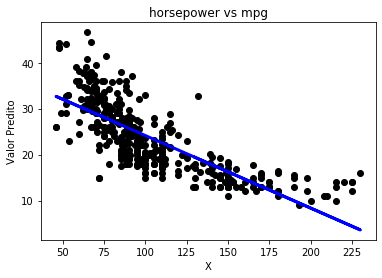

In [7]:
plt.title('horsepower vs mpg')
plt.scatter(X, Y,  color='black')
plt.plot(X, predictions, color='blue', linewidth=3)
plt.xlabel('X')
plt.ylabel('Valor Predito')
plt.show()

Pelo gráfico de resíduos vs valor predito, vemos que a relação não é linear, já que os pontos formam um padrão, ou seja, não estão distribuidos uniformemente

In [8]:
influence = model.get_influence()
student_resid = influence.resid_studentized_external
leverage = influence.hat_matrix_diag

Text(0, 0.5, 'Studentized Residuals')

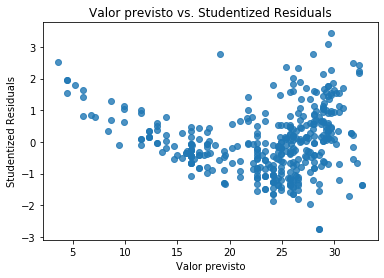

In [9]:
sns.regplot(predictions, model.resid_pearson,  fit_reg=False)
plt.title('Valor previsto vs. Studentized Residuals')
plt.xlabel('Valor previsto')
plt.ylabel('Studentized Residuals')

Text(0, 0.5, 'Studentized Residuals')

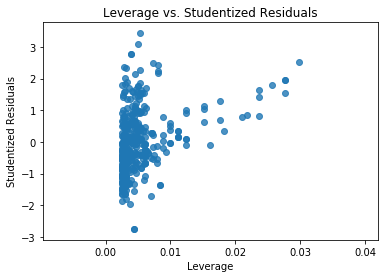

In [10]:
sns.regplot(leverage, model.resid_pearson,  fit_reg=False)
plt.title('Leverage vs. Studentized Residuals')
plt.xlabel('Leverage')
plt.ylabel('Studentized Residuals')

Vemos também que existem outliers (studentized residuals >= +3 ou <= -3) e pontos de alta alavancagem (pontos que excedem muito o valor (p+1)/n), sendo p o número de preditores

In [14]:
leverage_parametro = (1+1)/392
leverage_parametro

0.00510204081632653